In [1]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mlp
import matplotlib.pyplot as plt
import geopandas as gp
import seaborn as sb
import os
import re
import scipy.stats as st
%matplotlib inline
plt.style.use('ggplot')

def abrev(i):
    return i[0:3] + i[3:].replace("a", "").replace("e", "").replace("i", "").replace("o", "").replace("u", "")[0:3]

In [2]:
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.dpi"] = 120
pd.options.display.max_columns = 1000

In [3]:
os.chdir("../../../core")
import GT_helper_functions as hf
import GT_load_data as data

base_dir = "../../Outcome Measurement Data/MALARIA/"

In [4]:
# Esto no incluye toda las áreas del país. Sólo las áreas vistas en la base de datos de notifs.
notifs_das2depto = {
    "Escuintla": 5,
    "Alta Verapaz": 16,
    "Izabal" : 18,
    "Suchitepéquez" : 10,
    "Suchitepequez" : 10,
    "Santa Rosa" : 6,
    "Retalhuleu" : 11,
    "Petén Norte" : 17,
    "Peten Norte": 17,
    "Petén SurOccidente" : 17,
    "Petén SurOccidental" : 17,
    "Peten SurOriente" : 17,
    "Huehuetenango" : 13,
    "Quiché" : 14,
    "El Quiché": 14,
    "Petén Sur Oriental" : 17,
    "Baja Verapaz" : 15,
    "Sololá" : 7,
    "Zacapa" : 18,
    "Ixcán" : 14,
    "San Marcos" : 12,
    "Chimaltenango" : 4,
    "Guatemala Central" : 1,
    "Guatemala Sur" : 1,
    "Guatemala Nororiente" : 1,
    "Guatemala Noroccidente" : 1,
    "Ixil" : 14,
    "Jutiapa" : 22,
    "Chiquimula" : 20,
    "Ixcan" : 14,
    "El Progreso" : 2,
    "Guatemala Nororiental" : 1,
    "Quetzaltenango" : 9,
    "Jalapa": 21,
    "LNS": 1
}
code2depto = {
    5: "Escuintla",
    16:"Alta Verapaz",
    18: "Izabal",
    10: "Suchitepéquez",
    6: "Santa Rosa",
    11: "Retalhuleu",
    17: "Petén",
    13: "Huehuetenango",
    14: "Quiché",
    15: "Baja Verapaz",
    7: "Sololá",
    18: "Zacapa",
    12: "San Marcos",
    4: "Chimaltenango",
    1: "Guatemala",
    22: "Jutiapa",
    20: "Chiquimula",
    2: "El Progreso",
    9: "Quetzaltenango",
    3: "Sacatepequez",
    21: "Jalapa"
}

In [5]:
deptos = data.deptosGTshp

In [6]:
bednets = pd.read_csv(base_dir + "GTM - Bednets Distr.csv", index_col = 0 , low_memory=False)

In [7]:
notifs = pd.read_excel(base_dir + "Base de datos 2016 - 2018 NAD Consolidado 04.06.xlsx")

In [8]:
pdr = pd.read_excel(base_dir + "Movimientos MTILD y  PDR PERIODO FASE II.xls", 3, skiprows=2)
pdr.columns = ["das", 2015,2016,2017]
pdr["deptocode"] = pdr.das.apply(lambda x: notifs_das2depto.get(x.strip() if type(x) == str else "", np.NaN))
pdr = pdr.groupby("deptocode")[[2015,2016, 2017]].sum()
pdr2 = pdr.copy()

In [9]:
def clean(x):
    try: 
        return x.strip().lower()
    except:
        return np.NaN
notifs["deptocode"] = notifs.AREA.map(str.strip).map(notifs_das2depto.get)
notifs["GENERO"] = notifs["GENERO"].apply(clean)
notifs["Gender"] = notifs.GENERO.map(lambda x: "Male" if x == "m" else "Female" if x == "f" else np.NaN)
notifs["Year"] = notifs["FECHA TOMA DE MUESTRA"].map(lambda y: y.year)

In [10]:
#bednets["Sustit2"] = bednets.Sustit.map(lambda x: str(x).lower()[0] != "f")
bednets.Sustit_.value_counts()

False    395859
True     167127
Name: Sustit_, dtype: int64

In [11]:
#[(bednets.Sustit_==False)]
bednetsYears = bednets\
    .groupby(["year", "CodDepto_e"]).Pabellones.sum().unstack(0).fillna(0)
bednetsYears

year,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
CodDepto_e,,,,,,,
2.0,0.0,0.0,0.0,5137.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,2500.0,346.0,0.0,0.0
5.0,63189.0,12661.0,25526.0,75481.0,41708.0,20000.0,17309.0
6.0,0.0,0.0,6243.0,8393.0,18250.0,0.0,0.0
7.0,0.0,0.0,0.0,6070.0,1936.0,422.0,0.0
9.0,0.0,0.0,0.0,19881.0,17263.0,446.0,4090.0
10.0,63795.0,47455.0,0.0,56722.0,69967.0,59.0,0.0
11.0,29615.0,28312.0,0.0,45595.0,37450.0,0.0,27937.0
12.0,19487.0,20463.0,50.0,25054.0,20518.0,0.0,0.0


In [17]:
notifsYear = notifs.groupby(["Año", "deptocode"]).AREA.count().unstack(0).fillna(0)
notifsYear

Año,1900.0,2014.0,2015.0,2016.0,2017.0,2018.0
deptocode,,,,,,
1,0.0,0.0,3.0,11.0,13.0,0.0
2,0.0,0.0,2.0,0.0,2.0,0.0
4,0.0,0.0,12.0,3.0,2.0,0.0
5,5.0,1.0,3589.0,3194.0,2437.0,878.0
6,0.0,2.0,71.0,149.0,37.0,8.0
7,0.0,0.0,16.0,10.0,1.0,0.0
9,0.0,0.0,3.0,0.0,0.0,0.0
10,1.0,0.0,152.0,241.0,300.0,114.0
11,0.0,0.0,105.0,75.0,34.0,9.0


In [27]:
incidence = notifsYear.stack().rename("notifs").reset_index()
incidence["Population"] = incidence.apply(lambda x: 
                                      hf.GTDeptoPopulation(x.deptocode, x["Año"]), 1)

In [29]:
incidence["incidence"] = incidence.notifs/incidence.Population
incidence[incidence["Año"] == 2017]

,deptocode,Año,notifs,Population,incidence
4,1,2017.0,13.0,3.579798e+06,0.000004
10,2,2017.0,2.0,1.741488e+05,0.000011
16,4,2017.0,2.0,6.841371e+05,0.000003
22,5,2017.0,2437.0,7.996138e+05,0.003048
28,6,2017.0,37.0,3.839347e+05,0.000096
34,7,2017.0,1.0,4.871665e+05,0.000002
40,9,2017.0,0.0,8.802717e+05,0.000000
46,10,2017.0,300.0,6.214081e+05,0.000483
52,11,2017.0,34.0,3.553525e+05,0.000096
58,12,2017.0,8.0,1.010093e+06,0.000008


In [25]:
print("TOTAL INCIDENCE: ", notifsYear[2017].sum()/hf.GTDeptoPopulation(range(1,23), 2017).sum(), 
      notifsYear[2017].sum(), 
      hf.GTDeptoPopulation(range(1,23), 2017).sum())

TOTAL INCIDENCE:  0.00024818538368985137 4090.0 16479616.725178026


In [15]:
incidence = incidence[incidence["Año"]>2014]
incidence = incidence.rename(columns={"Año":  "Year"}).pivot_table(values = "incidence", index = "deptocode",
                                           columns="Year")

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:6070: RuntimeWarning: divide by zero encountered in log10
  return lib.map_infer(x.astype(object).values, func)


(array([28., 16., 15.,  5.,  4.,  4.,  3.,  0.,  2.,  2.]),
 array([1.90000e+01, 1.08627e+04, 2.17064e+04, 3.25501e+04, 4.33938e+04,
        5.42375e+04, 6.50812e+04, 7.59249e+04, 8.67686e+04, 9.76123e+04,
        1.08456e+05]),
 <a list of 10 Patch objects>)

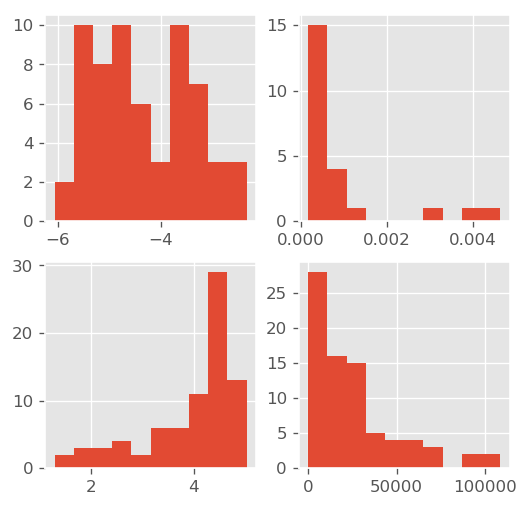

In [36]:
mlp.rcParams["figure.figsize"] = [5,5]
plt.subplot(2,2,1)
x = np.ndarray.flatten((incidence).applymap(np.log10).values)
plt.hist(x[np.isinf(x) ==False])
plt.subplot(2,2,2)
x = np.ndarray.flatten((incidence).values)
plt.hist(x[x>0.0001])
plt.subplot(2,2,3)
x = np.ndarray.flatten((bednetsYears).applymap(np.log10).values)
plt.hist(x[np.isinf(x) ==False])
plt.subplot(2,2,4)
x = np.ndarray.flatten((bednetsYears).values)
plt.hist(x[x>10])

In [401]:
ymax = bednetsYears.max().max()
xmax = notifsYear.max().max()

def plotNotifsVsBednets(ax, year = 2015, ylabel = True, diff = -1, log10scale = True):
    temp = pd.DataFrame(data = [bednetsYears[year+diff], incidence[year]]).T.fillna(0)
    if log10scale:
        corr = np.round(np.log10(temp).corr().values[0][1], 2)
    else: 
        corr = np.round(temp.corr().values[0][1], 2)
    i, b = ("Incidence" + (" (Log10)" if log10scale else ""), "Bednets" + (" (Log10)" if log10scale else ""))
    temp.columns = [b, i]
    if log10scale:
        ax.set_yscale("log", basey=10)
        ax.set_xscale("log", basex=10)
    plt.scatter(temp[i], temp[b], color="blue")
    plt.text(0.05,0.9, "Correlation = "+str(corr), transform=ax.transAxes)
    for _i, row in temp.iterrows():
        if (row[i] > 0) & (row[b] > 0):
            plt.annotate(xy = (row[i], 
                               row[b]), s = str(int(_i)), 
                     horizontalalignment = np.random.choice(["left", "right"]))
        
    if ylabel == False:
        ax.set_ylabel("")
    return temp

/home/guillermo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


Text(0.5,0.98,'Incidence vs Bednets distributed a year before ')

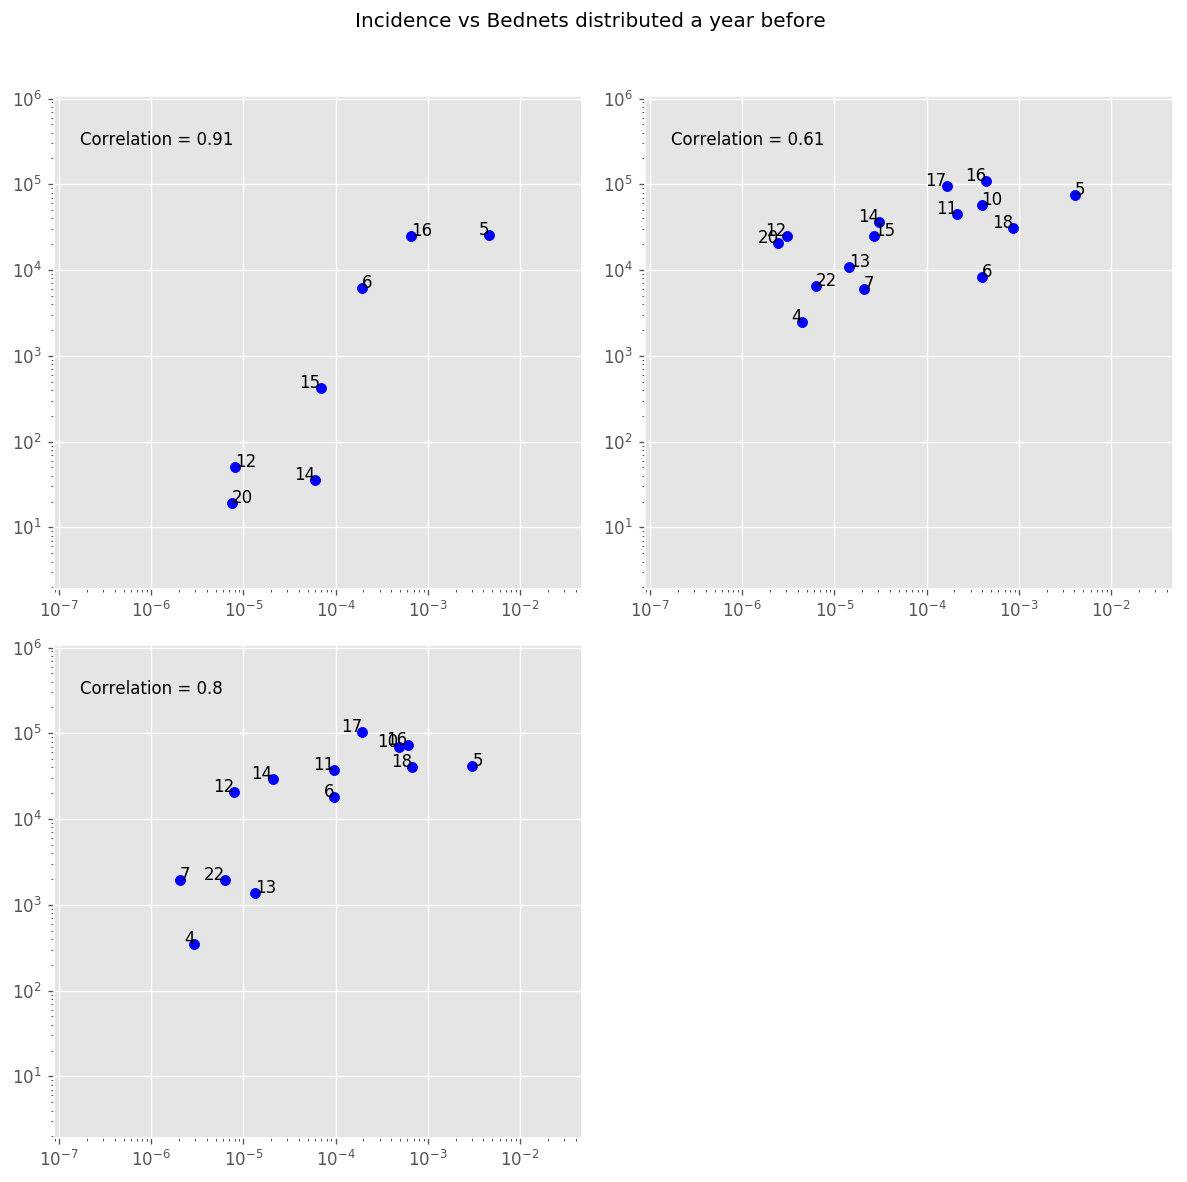

In [402]:
mlp.rcParams['figure.figsize'] = [10.0, 10.0]
xlims = (np.min(list(filter(lambda x: x>0, incidence.values.flatten())))/10, 
                np.max(incidence.values.flatten())*10)
ylims = (np.min(list(filter(lambda x: x>0, bednetsYears.values.flatten())))/10, 
                np.max(bednetsYears.values.flatten())*10)

ax = plt.subplot(2,2,1)
data = plotNotifsVsBednets(ax, 2015)
ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(ylims[0], ylims[1])
ax = plt.subplot(2,2,2)
plotNotifsVsBednets(ax, 2016, False)
ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(ylims[0], ylims[1])
ax = plt.subplot(2,2,3)
plotNotifsVsBednets(ax, 2017, False)
ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(ylims[0], ylims[1])
plt.tight_layout(rect=(0.0,0,1,0.93))
plt.suptitle("Incidence vs Bednets distributed a year before ")

/home/guillermo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


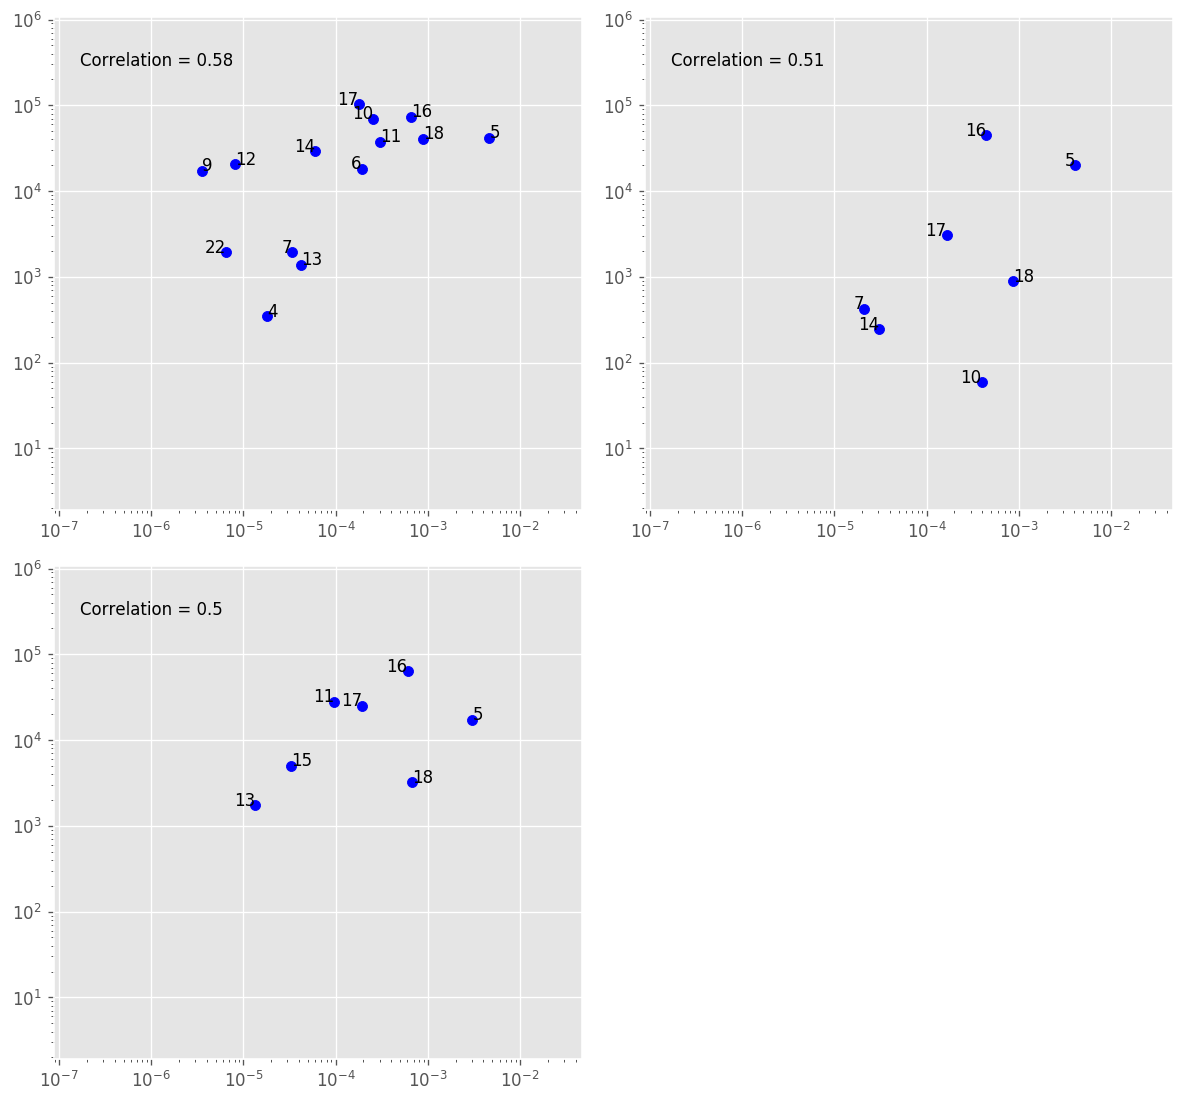

In [403]:
ax = plt.subplot(2,2,1)
plotNotifsVsBednets(ax, 2015, diff = 1)
ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(ylims[0], ylims[1])
ax = plt.subplot(2,2,2)
plotNotifsVsBednets(ax, 2016, False, diff = 1)
ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(ylims[0], ylims[1])
ax = plt.subplot(2,2,3)
plotNotifsVsBednets(ax, 2017, False, diff = 1)
ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(ylims[0], ylims[1])
plt.tight_layout(rect=(0.0,0,1,0.93))
#plt.suptitle("Incidence vs Bednets distributed a year after ")"""

/home/guillermo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


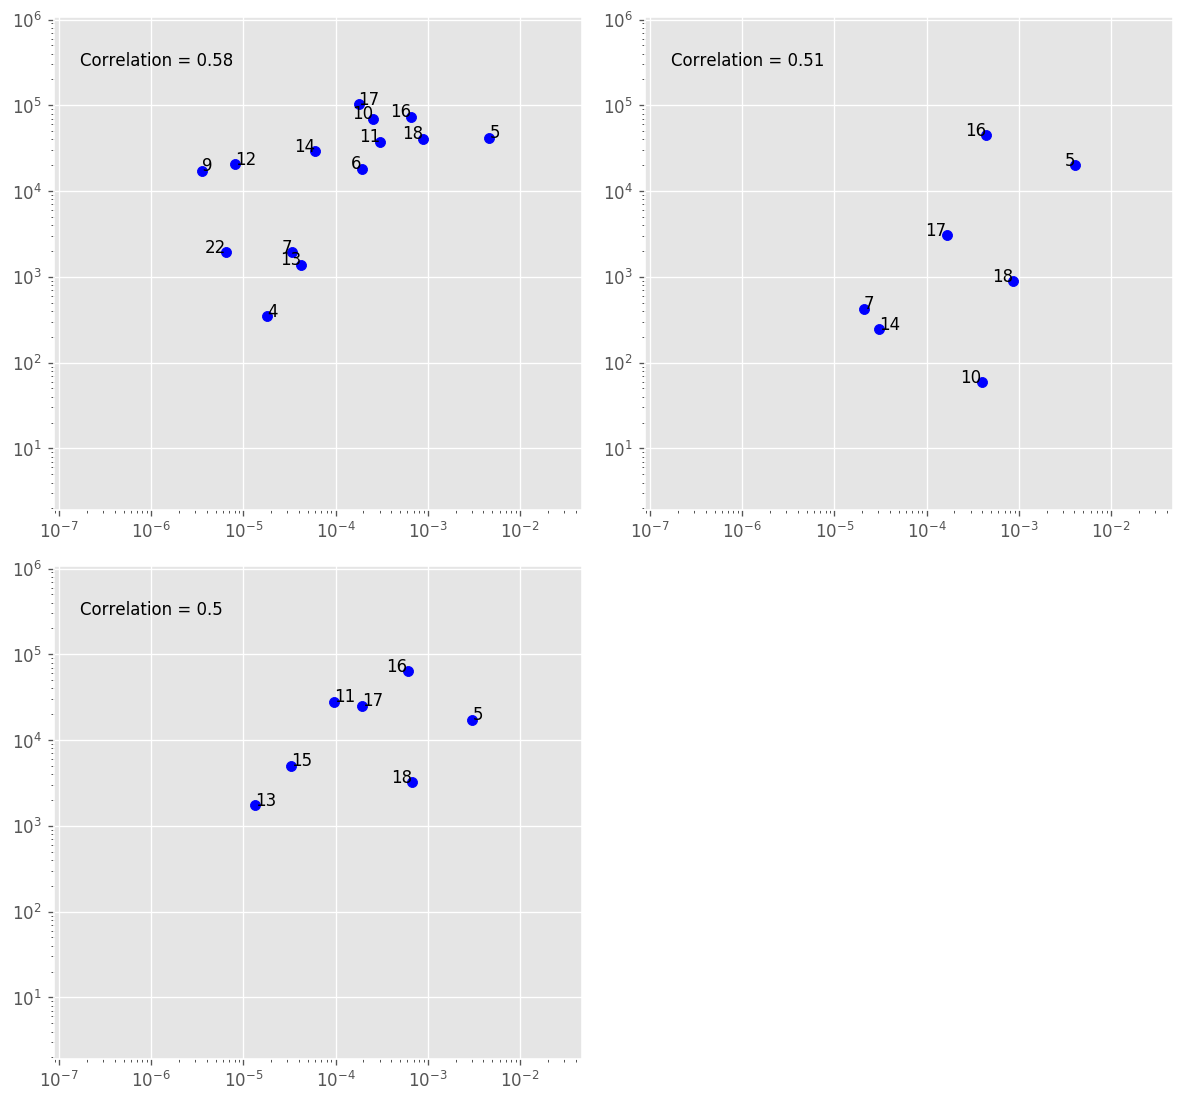

In [404]:
mlp.rcParams['figure.figsize'] = [10.0, 10.0]
xlims = (np.min(list(filter(lambda x: x>0, incidence.values.flatten())))/10, 
                np.max(incidence.values.flatten())*10)
ylims = (np.min(list(filter(lambda x: x>0, bednetsYears.values.flatten())))/10, 
                np.max(bednetsYears.values.flatten())*10)
    
ax = plt.subplot(2,2,1)
plotNotifsVsBednets(ax, 2015, diff=1)
ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(ylims[0], ylims[1])
ax = plt.subplot(2,2,2)
plotNotifsVsBednets(ax, 2016, False, diff=1)
ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(ylims[0], ylims[1])
ax = plt.subplot(2,2,3)
plotNotifsVsBednets(ax, 2017, False, diff=1)
ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(ylims[0], ylims[1])
plt.tight_layout(rect=(0.0,0,1,0.93))
#plt.suptitle("Incidence vs Bednets distributed a year before ")"""

In [57]:
pblYears = bednetsYears.divide(1000).reset_index()\
                         .assign(deptocode=lambda x: (x.CodDepto_e * 100).astype(int).astype(str)\
                                 .map(lambda y: y if y != "100" else "101"))

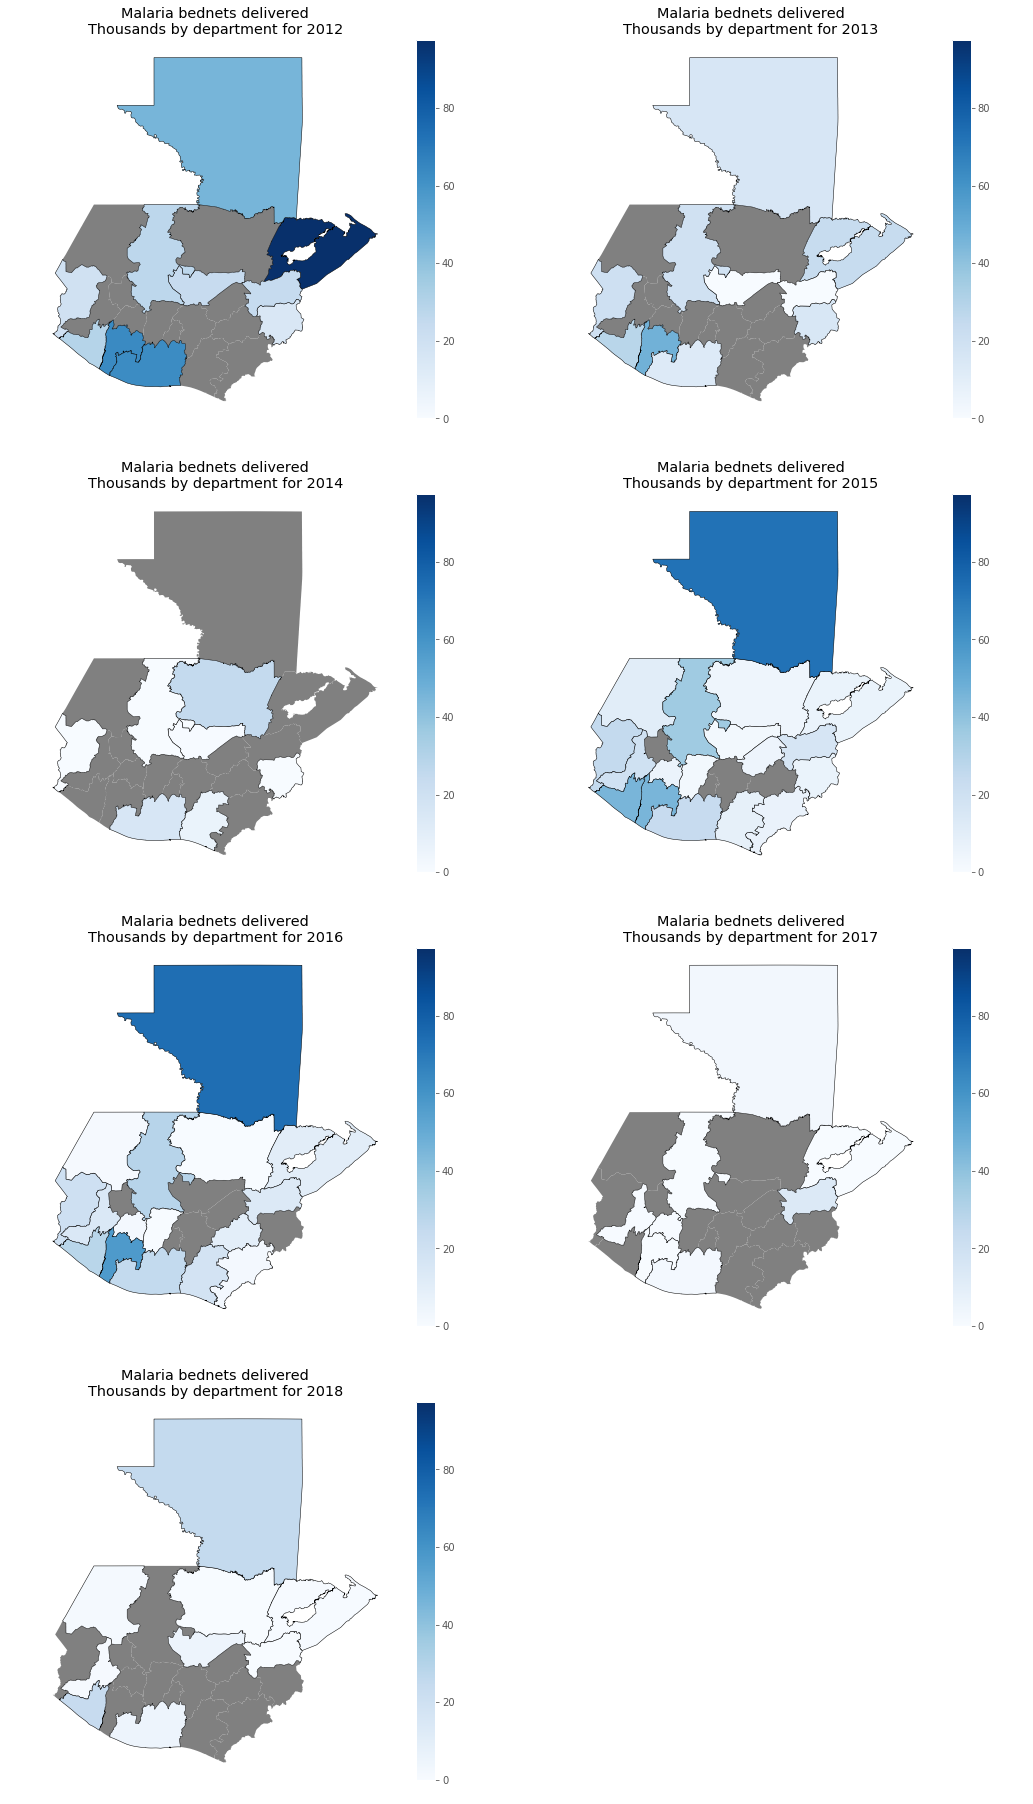

In [36]:
vmax = pblYears[list(range(2012,2018))].max().max()

side = 8
n = 7
vmin = 0
#vmax = 8
f, axes = plt.subplots(int(np.ceil(n/2)), 2, figsize=(side*2*1.1, side*np.ceil(n/2) ))
i = 2012
for row in axes:
    for ax in row:
        if i not in pblYears:
            ax.axis("off")
            continue
        temp3 = deptos.merge(pblYears[[i, "deptocode"]], 
                             left_on="CODIGO", right_on = "deptocode", how="left" ).fillna(0)
        temp3[temp3[i] == 0].plot(ax=ax, color="grey")
        if sum(temp3[i] > 0) > 0:
            temp3[temp3[i] > 0].plot(i, ax = ax, cmap = "Blues", 
                                             legend=True, edgecolor="black",
                                             vmin = vmin, vmax = vmax)
        ax.axis('off')
        ax.set_title("Malaria bednets delivered\nThousands by department for "+ str(i))
        i += 1

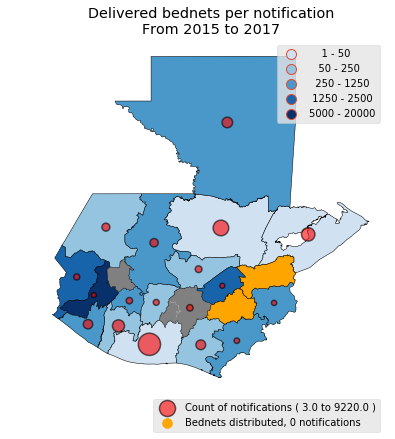

In [37]:
bn_over_notifs = bednetsYears[[2015,2016,2017]].sum(axis=1).divide(notifsYear[[2015,2016,2017]]\
                    .sum(axis=1).reindex(bednetsYears.index).fillna(0))\
                    .reset_index()
bn_over_notifs.columns = ["deptocode", "_i"]
bn_over_notifs["i"] = pd.cut(bn_over_notifs._i, bins = [0,1,50,250,1250,2500, 5000,20000,25000], 
                          labels = ["    0 - 1", "    1 - 50", "   50 - 250", "  250 - 1250", " 1250 - 2500", "2500 - 5000", 
                                    "5000 - 20000", "5000-25000"])
mlp.rcParams['figure.figsize'] = [6.2, 6.2]
temp = deptos.merge(bn_over_notifs.assign(deptocode=lambda x: (x.deptocode * 100).astype(int).astype(str)\
                                 .map(lambda y: y if y != "100" else "101")), 
                     left_on="CODIGO", right_on = "deptocode", how="left" )
ax = temp[temp.i.isna()].plot(color="grey") 
    
temp[temp.i.isna()==False].plot("i", ax=ax, vmin = -1,
                                legend=True, edgecolor="black", categorical = True, cmap = "Blues")
temp2 = deptos.merge(notifsYear[[2015,2016,2017]].sum(axis=1,skipna=True).rename("values").reset_index()\
                     .assign(deptocode=lambda x: (x.deptocode * 100).astype(int).astype(str)\
                     .map(lambda y: y if y != "100" else "101")), 
                     left_on="CODIGO", right_on = "deptocode", how="left" )\
    .assign(x = lambda row: row.geometry.centroid.x)\
    .assign(y = lambda row: row.geometry.centroid.y)
l1 = ax.get_legend()

plt.scatter(temp2.x, temp2.y, np.sqrt(temp2["values"])*5+15, c = "red", alpha=0.6, linewidths=1.5, edgecolors="black", 
            label = "Count of notifications ( " + str(temp2["values"].min()) + " to " + str(temp2["values"].max()) + " )")
if sum(np.isinf(temp._i)) > 0:
    # Departments with distr. of bednets but no registered Malaria cases.
    temp[np.isinf(temp._i)].plot(ax = ax, color="orange", edgecolors="black")  
plt.scatter([],[], 100, c="orange", label = "Bednets distributed, 0 notifications")
plt.legend(bbox_to_anchor=(1,0))
plt.gca().add_artist(l1)
plt.axis("off")
#ax.legend(ax.legend().get_ labels=["a", "n", "c", "d"])
plt.title("Delivered bednets per notification\nFrom 2015 to 2017")
plt.tight_layout()

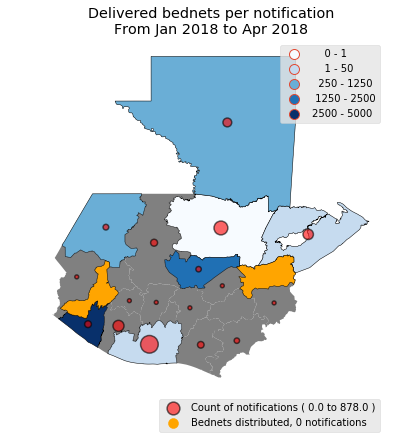

In [38]:
bn_over_notifs = bednetsYears[[2018]].sum(axis=1).divide(notifsYear[[2018]]\
                    .sum(axis=1).reindex(bednetsYears.index).fillna(0))\
                    .reset_index()
bn_over_notifs.columns = ["deptocode", "_i"]
bn_over_notifs["i"] = pd.cut(bn_over_notifs._i, bins = [0,1,50,250,1250,2500, 5000,20000,25000], 
                          labels = ["    0 - 1", "    1 - 50", "   50 - 250", "  250 - 1250", " 1250 - 2500", "2500 - 5000", 
                                    "5000 - 20000", "5000-25000"])
mlp.rcParams['figure.figsize'] = [6.2, 6.2]
temp = deptos.merge(bn_over_notifs.assign(deptocode=lambda x: (x.deptocode * 100).astype(int).astype(str)\
                                 .map(lambda y: y if y != "100" else "101")), 
                     left_on="CODIGO", right_on = "deptocode", how="left" )
ax = temp[temp.i.isna()].plot(color="grey") 
    
temp[temp.i.isna()==False].plot("i", ax=ax, vmin = 0,
                                legend=True, edgecolor="black", categorical = True, cmap = "Blues")
temp2 = deptos.merge(notifsYear[[2018]].sum(axis=1,skipna=True).rename("values").reset_index()\
                     .assign(deptocode=lambda x: (x.deptocode * 100).astype(int).astype(str)\
                     .map(lambda y: y if y != "100" else "101")), 
                     left_on="CODIGO", right_on = "deptocode", how="left" )\
    .assign(x = lambda row: row.geometry.centroid.x)\
    .assign(y = lambda row: row.geometry.centroid.y)
l1 = ax.get_legend()

plt.scatter(temp2.x, temp2.y, np.sqrt(temp2["values"])*10+15, c = "red", alpha=0.6, linewidths=1.5, edgecolors="black", 
            label = "Count of notifications ( " + str(temp2["values"].min()) + " to " + str(temp2["values"].max()) + " )")
if sum(np.isinf(temp._i)) > 0:
    # Departments with distr. of bednets but no registered Malaria cases.
    temp[np.isinf(temp._i)].plot(ax = ax, color="orange", edgecolors="black")  
plt.scatter([],[], 100, c="orange", label = "Bednets distributed, 0 notifications")
plt.legend(bbox_to_anchor=(1,0))
plt.gca().add_artist(l1)
plt.axis("off")
#ax.legend(ax.legend().get_ labels=["a", "n", "c", "d"])
plt.title("Delivered bednets per notification\nFrom Jan 2018 to Apr 2018")
plt.tight_layout()

(Propuesta de Jorge: Correlación entre diferencia de casos de 1 año con el anterior partido las bednets distribuidas en el año anterior. Para cada año)


In [19]:
def compareYears(ax, year, lagb = 1, lagn = 1):
    plt.xscale("log", basex=10)
    #plt.yscale("log", basey=10)
    notifsdiff = notifsYear[year].reindex(list(range(1,23))).sort_index().fillna(0).divide(\
                notifsYear[year-lagn].reindex(list(range(1,23))).sort_index().fillna(0) )
    bednetsprev = bednetsYears[year - lagb].reindex(list(range(1,23))).sort_index().fillna(0)
    plt.scatter(bednetsprev,  notifsdiff)
    #corr = np.corrcoef([bednetsprev, notifsdiff])
    #plt.text(0.05,0.9, "Correlation = "+str(corr[1][0]), transform=ax.transAxes)
    plt.ylabel("Relation of notifications \nbetween years \n " + str(year) + "/"+ str(year-lagn) )
    for b, n, depto in zip(bednetsprev,  notifsdiff, bednetsprev.index):
        if (np.isnan(n) ==False) &\
            (np.isnan(b) ==False) & (np.isinf(n) == False) & (b>0):
            try:
                plt.text(b, n, str(depto), fontsize=8,
                     horizontalalignment = np.random.choice(["left", "right"]))
            except: 
                pass

    plt.xlabel("Bednets in "+ str(year-lagb) )
    #plt.ylim(0.1, 100)
    plt.xlim(0.5, 100*bednetsprev.max())
    return notifsdiff, bednetsprev

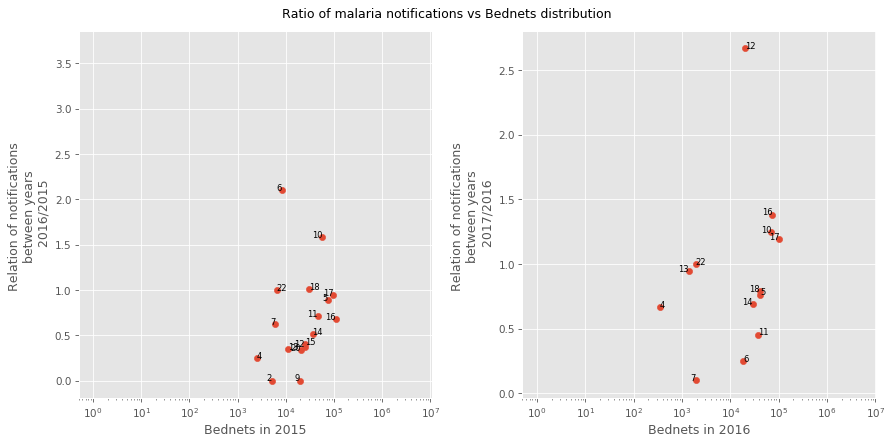

In [20]:
mlp.rcParams['figure.figsize'] = [12, 6]
ax = plt.subplot(1,2,1)
compareYears(ax, 2016, lagb = 1, lagn = 1)
ax = plt.subplot(1,2,2)
data = compareYears(ax, 2017, lagb = 1, lagn = 1)
plt.suptitle("Ratio of malaria notifications vs Bednets distribution")
plt.tight_layout(rect=(0, 0, 1, 0.96))

In [21]:
notifs.Year.value_counts()

2015.0    5411
2016.0    4800
2017.0    4089
2018.0    1463
2014.0       4
Name: Year, dtype: int64

In [58]:
def age_groups(x):
    if x < 40:
        x = np.floor(x/10)*10
        return str(int(x)) + " - " + str(int(x+10))  
    elif x < 60:
        return "40 - 60"
    else:
        return "60 - 100"

In [23]:
d = notifs[(notifs.GENERO!="d") & (notifs.EDAD < 100) & (notifs.deptocode==5)
          ]\
        .assign(AgeGroup = lambda x: x.EDAD.map(age_groups)).groupby(["AgeGroup","GENERO", "deptocode"]).deptocode.count()\
    .rename("Cases").reset_index()

In [63]:
def plotBetaDistr(a,b):
    x = np.linspace(0,1, 100)
    plt.plot(x, st.beta.pdf(x, a,b)/st.beta.pdf(x, a,b).max() )
    plt.plot(x, st.beta.cdf(x, a,b))
    plt.vlines(st.beta.isf([0.025, 0.975], a,b), [0,0], [1,1])
    
def ratioBayesian(a,b, tol = 0.05):
    phi1 = st.beta.isf(tol/2, a,b)/ (1-st.beta.isf(tol/2, a,b))
    phi2 = st.beta.isf(1-tol/2, a,b)/ (1-st.beta.isf(1-tol/2, a,b))
    return [a/b, phi1,phi2]

def bernoulliBayesian(a,b, tol = 0.05):
    ci = st.beta.isf([tol/2, 1-tol/2], a,b)
    return [a/(a+b), ci[0], ci[1]]

#ratioBayesian(5,10)

In [32]:
#plotBetaDistr(100,100)
sorted(ratioBayesian(23,4))


[2.3163052103242965, 5.75, 21.95500909130844]

0.09308773935027248 0.08571650904412609 [-1.204493574894039, -1.1114058355437666, -1.0256893264996405]
0.06501966535895787 0.06143809326068306 [-1.221334796663668, -1.1563151313047102, -1.0948770380440271]
0.07927141415184513 0.07409946937468659 [-1.263559659869506, -1.184288245717661, -1.1101887763429743]
0.09203570900582059 1.0881252649378517 [-1.1173275377995948, -1.0252918287937742, -0.9408812011296568]
1.0962283151263839 0.10158281558846571 [0.9401410540103811, 1.0325581395348837, 1.1341409551233494]
0.1980652061108228 1.1697382600294826 [-1.320808888421292, -1.1227436823104693, -0.9551147840503664]


,Age,Female,Male,Difference,CI_1,CI_2
0,0 - 10,1131,1257,-1.204494,-1.111406,-1.025689
1,10 - 20,2399,2774,-1.221335,-1.156315,-1.094877
2,20 - 30,1693,2005,-1.263560,-1.184288,-1.110189
3,30 - 40,1028,1054,-1.117328,-1.025292,-0.940881
4,40 - 60,888,860,0.940141,1.032558,1.134141
5,60 - 100,277,311,-1.320809,-1.122744,-0.955115


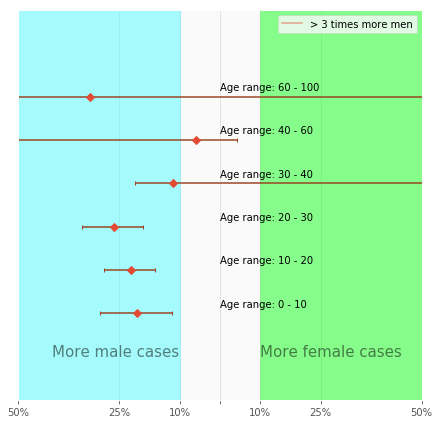

In [40]:
mlp.rcParams['figure.figsize'] = [6, 6]
d2 = notifs[(notifs.GENERO!="d") & (notifs.EDAD < 100)
          ]\
        .assign(AgeGroup = lambda x: x.EDAD.map(age_groups)).groupby(["GENERO", "AgeGroup" #, "deptocode"
                                                                     ]).deptocode.count()\
    .rename("Cases").unstack(0).fillna(0)
diffs = []
j = 0
for i, x in d2.iterrows():
    output = sorted([y*-1 for y in ratioBayesian(x.m,x.f, 0.05)] if x.m>x.f else ratioBayesian(x.f,x.m,0.05))
    
    #if (output[2]>1) | (output[2]<-1):
    if True:
        diffs.append([i, #[0], i[1], 
                      x.f, x.m, output[0], output[1], output[2]])
        lim1 = (output[1]-output[0] if abs(output[0])>1 else abs(1/output[0])-1+abs(output[1]) )
        lim2 = (output[2]-output[1] if abs(output[2])>1 else abs(1/output[2])-1+abs(output[1]) )
        print(lim1, lim2, output)
        plt.errorbar(output[0]+(1 if output[0]<0 else -1), j,
                     xerr = [[lim1],[lim2]], fmt="D", ecolor="#994422", capsize=2)
        plt.text(0, #0.2+max(output[0]+(1 if output[0]<0 else -1), -3), 
                 j+0.1, 
                 "Age range: " + i, #[0], + "\n" + code2depto[i[1]], #rotation=90, 
                 verticalalignment='bottom')
        j+=1
diffsdf = pd.DataFrame(diffs, columns= ["Age", #"Department", 
                                        "Female", "Male", "Difference", "CI_1", "CI_2"])
plt.fill_between([-4.2,-0.1], [-2]*2, [len(diffsdf)+1]*2, color="#52fcff", alpha = 0.5)
plt.fill_between([0.1,4.2], [-2]*2, [len(diffsdf)+1]*2, color="#14ff1c", alpha = 0.5)
plt.text(-0.1, -1, "More male cases", fontsize=15, alpha=0.5, horizontalalignment="right")
plt.text(0.1, -1, "More female cases", fontsize=15, alpha=0.5, horizontalalignment="left")
plt.yticks([])
plt.grid(True, "both", color="#dedede")
plt.rcParams['axes.facecolor'] = '#fafafa'
plt.ylim(-2, len(diffsdf)+1)
plt.axvline(-2.95, alpha=0.5, label="> 3 times more men")
plt.tight_layout(rect=(0,0,1,1))
plt.legend()
plt.xticks([-0.5,-0.25,-0.10,0,0.1,0.25,0.5], ["50%", "25%", "10%", "", "10%", "25%", "50%"])
plt.xlim(-0.5, 0.5)
diffsdf
#plt.errorbar(diffsdf.Age, diffsdf.Difference, yerr = diffsdf[["CI_1", "CI_2"]].T.values)
#diffsdf[["CI_1", "CI_2"]].T.shape

/home/guillermo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


Text(0.5,1,'Malaria - Gender differences by age and department\nNotifications from 2015 to Apr 2018')

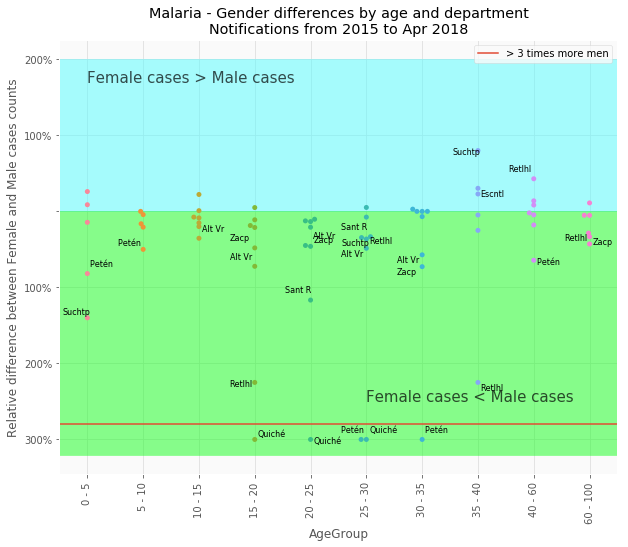

In [111]:
d2 = notifs[(notifs.GENERO!="d") & (notifs.EDAD < 100)
          ]\
        .assign(AgeGroup = lambda x: x.EDAD.map(age_groups)).groupby(["AgeGroup","GENERO", "deptocode"]).deptocode.count()\
    .rename("Cases").unstack(1).fillna(0)
mlp.rcParams['figure.figsize'] = [10, 8]
d = d2[["m", "f"]].apply(lambda x: \
              ((-(x.m-x.f)/x.f if x.m>x.f else (x.f-x.m)/x.m) if x.m+x.f > 15 else np.NaN),1)\
    .apply(lambda x: 0 if np.isinf(x) else -3 if x<-3 else x)\
    .rename("Female-Male").reset_index()
order = [str(x) + " - " + str(x+5) for x in range(0,40, 5)] + ["40 - 60", "60 - 100"]
ageg2x = dict(zip(order, range(0,len(order))))
sb.swarmplot("AgeGroup", "Female-Male", data = d, order=order)
for i, row in d.sort_values("Female-Male").iterrows():
    if abs(row["Female-Male"])>0.3:
        plt.text(ageg2x[row.AgeGroup]+ (-0.45 if np.random.choice([True,False]) else 0.05), 
                 row["Female-Male"]+np.random.choice([0.1,-0.1,0.05,-0.05]), abrev(code2depto[row.deptocode]), fontsize=8)
plt.fill_between([-1,10], [0, 0], [2,2], color="#52fcff", alpha = 0.5)
plt.fill_between([-1,10], [0, 0], [-3.2,-3.2], color="#14ff1c", alpha = 0.5)
plt.grid(True, "both", color="#dedede")
plt.rcParams['axes.facecolor'] = '#fafafa'
plt.xticks(rotation=90)
plt.axhline(-2.8, label="> 3 times more men")
plt.legend()
plt.yticks([2,1,0,-1,-2,-3], ["200%", "100%", "", "100%", "200%", "300%"])
plt.ylabel("Relative difference between Female and Male cases counts")
plt.text(0, 1.7, "Female cases > Male cases", fontsize=15, alpha=0.7)
plt.text(5, -2.5, "Female cases < Male cases", fontsize=15, alpha=0.7)
plt.title("Malaria - Gender differences by age and department\nNotifications from 2015 to Apr 2018")

In [84]:
notifs[(notifs.GENERO!="d") & (notifs.EDAD < 100) & (notifs.deptocode==14)
          ]\
        .assign(AgeGroup = lambda x: x.EDAD.map(age_groups)).groupby(["AgeGroup","GENERO", "deptocode"]).deptocode.count()\
    .rename("Cases").unstack(1).fillna(0)

,GENERO,f,m
AgeGroup,deptocode,,
0 - 5,14,1.0,2.0
10 - 15,14,3.0,6.0
15 - 20,14,3.0,13.0
20 - 25,14,3.0,23.0
25 - 30,14,3.0,23.0
30 - 35,14,0.0,18.0
35 - 40,14,3.0,7.0
40 - 60,14,2.0,13.0
5 - 10,14,2.0,2.0


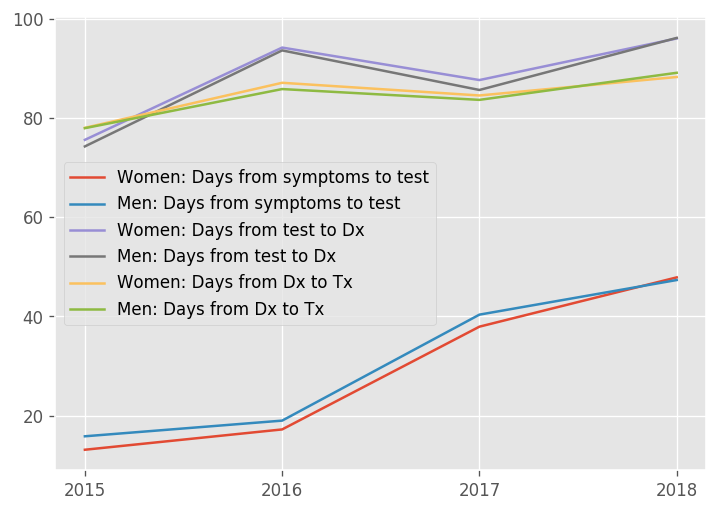

In [304]:
mlp.rcParams['figure.figsize'] = [7, 5]

d = notifs[(notifs.GENERO!="d") & (notifs.EDAD < 100) & (notifs.Year > 2014)
          ].groupby(["Gender", "Year"]).agg({
    'Sintytom': lambda x: 100*sum(x<=3)/len(x), 
    'tomydiag': lambda x: 100*sum(x<=3)/len(x), 
    'diagytrat': lambda x: 100*sum(x<=3)/len(x)
}).unstack(0)
plt.plot(d) 
plt.legend(labels=["Women: Days from symptoms to test", 
                   "Men: Days from symptoms to test", 
                   "Women: Days from test to Dx",
                   "Men: Days from test to Dx",
                   "Women: Days from Dx to Tx",
                   "Men: Days from Dx to Tx"], title="")
plt.grid(True)
plt.xticks([2015, 2016, 2017, 2018], [2015,2016,2017,2018])
d
plt.savefig("/tmp/3days.svg")
#plt.title("Malaria: \nPercentage of delays that are less than 3 days long")

In [61]:
d = notifs[(notifs.GENERO!="d") & (notifs.EDAD < 100) & (notifs.Year > 2014)
          ].groupby(["Gender", "Year"]).agg({
    'Sintytom': lambda x: sum(x<=3), 
    'tomydiag': lambda x: sum(x<=3), 
    'diagytrat': lambda x: sum(x<=3)
}).unstack(0)
d

Sintytom        tomydiag         diagytrat        
Gender   Female   Male   Female    Male    Female    Male
Year                                                     
2015.0    336.0  448.0   1934.0  2100.0    1996.0  2204.0
2016.0    381.0  478.0   2083.0  2355.0    1926.0  2159.0
2017.0    732.0  870.0   1691.0  1846.0    1631.0  1803.0
2018.0    339.0  357.0    680.0   725.0     625.0   672.0

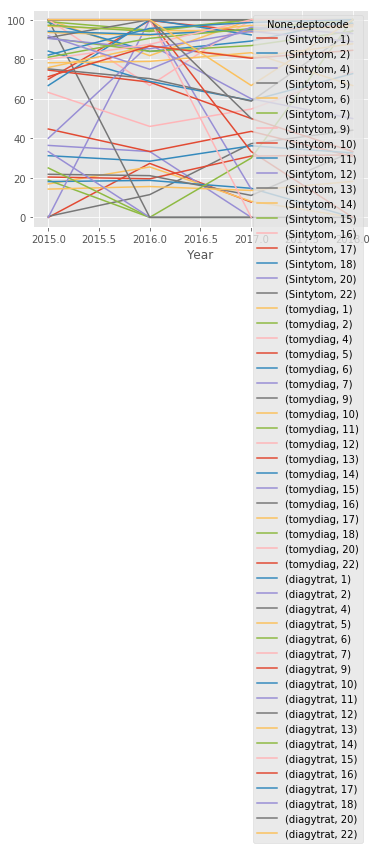

In [68]:
d = notifs[(notifs.EDAD < 100) & (notifs.Year > 2014)
          ].groupby(["deptocode", "Year"]).agg({
    'Sintytom': lambda x: 100*sum(x<=3)/len(x), 
    'tomydiag': lambda x: 100*sum(x<=3)/len(x), 
    'diagytrat': lambda x: 100*sum(x<=3)/len(x)
}).round(1)
d.unstack(0).plot()

In [263]:

mlp.rcParams['figure.figsize'] = [7, 3]
def delayPlot(column):
    q1,q2,q3 = (
     np.nanpercentile(notifs[column][notifs[column]>3],25),
     np.nanpercentile(notifs[column][notifs[column]>3],50),
     np.nanpercentile(notifs[column][notifs[column]>3],75))
    iqr = q3-q1
    m = notifs[column][notifs[column]>3].mean()
    ax = plt.subplot(1,1,1)
    ungrouped = notifs[(notifs.GENERO!="d") & (notifs[column]>3) & (np.abs(notifs[column]-m)<(1.5*iqr)) & 
           (notifs.EDAD < 100) & (notifs.Year > 2014)]
    grouped = ungrouped.groupby(["Year", "GENERO"])[column]
    #grouped.count().unstack(1).plot(ax=ax)
    #plt.ylabel("Number of cases")
    #plt.legend().remove()
    #ax = plt.subplot(2,1,2)
    means = grouped.mean().reset_index() #.unstack(1)
    ses =  grouped.apply(st.sem).reset_index()
    #means.unstack(1).plot(ax=ax)
    plt.errorbar(means[means.GENERO=="f"].Year, means[means.GENERO=="f"][column],
                 yerr = ses[ses.GENERO=="f"][column], capsize=2, color="#CC3333", label="f")
    plt.errorbar(means[means.GENERO=="m"].Year+0.01, means[means.GENERO=="m"][column],
                 yerr = ses[ses.GENERO=="m"][column], capsize=2, color="#5373FF", label="m")
    plt.legend(title="Gender")
    plt.xticks([2015,2016,2017,2018])
    plt.ylabel("Mean days delay")
    plt.tight_layout(rect=(0,0,1,0.9))
    return grouped

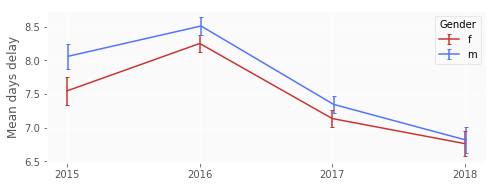

In [264]:
g = delayPlot("Sintytom")
#plt.suptitle("Average days between Symptoms and Test \nfor delays > 3 days")

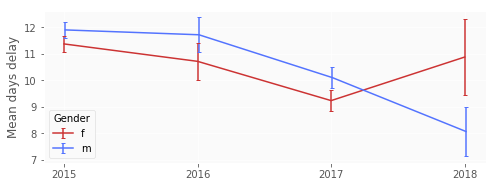

In [265]:
g = delayPlot("tomydiag")
#plt.suptitle("Average days between Test and Dx \nfor delays > 3 days")

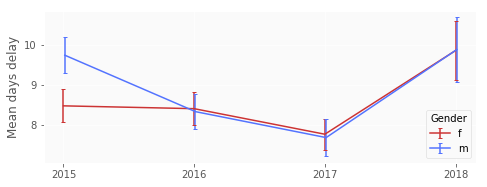

In [266]:
delayPlot("diagytrat")
#plt.suptitle("Average days between Dx and Tx \nfor delays > 3 days")

# Analysis of Malaria bednets effect on incidence 

### Prepare lags

In [447]:
g.sum().sum()

40886.0

In [240]:
notifsSemester = notifs[notifs.Year > 2014].assign(Semester = lambda x: \
                                      x["FECHA TOMA DE MUESTRA"].map(lambda y: (2 if y.month>6 else 1)))\
    .groupby(["deptocode", "Year", "Semester"]).Year.count().unstack([1,2], fill_value = 0).stack([0,1]).rename("Notifs").reset_index()
notifsSemester["semindex"] = 2*(notifsSemester.Year - 2014) + notifsSemester.Semester

In [241]:
bednetsSemester = bednets[((bednets.year==2018) & (bednets.month >= 7)) == False]\
        .assign(Semester = lambda x: x.month.map(lambda y: 2 if y > 6 else 1))\
        .groupby(["year", "Semester", "CodDepto_e"])\
         .Pabellones.sum().unstack([0,1], fill_value = 0).stack([0,1]).reset_index()
bednetsSemester["semindex"] = 2*(bednetsSemester.year - 2014) + bednetsSemester.Semester

In [242]:
def lagBednet(i):
    def lagCalc(x):
        bednetsLag = bednetsSemester[(bednetsSemester.CodDepto_e == x.deptocode) &(bednetsSemester.semindex == (x.semindex - i))][[0]]
        bednetsLag2 = bednetsSemester[(bednetsSemester.CodDepto_e == x.deptocode) &(bednetsSemester.semindex == (x.semindex - i - 1))][[0]]
        
        if len(bednetsLag) == 1:
            return bednetsLag2.values[0][0]+bednetsLag.values[0][0]
        else:
            return 0
    return lagCalc

for i in range(1,5):
    notifsSemester["bednetsLagSem_"+str(i)] = notifsSemester.apply(lagBednet(i), axis = 1)

In [243]:
def lagNotifs(i):
    def lagCalc(x):
        notifsLag = notifsSemester[(notifsSemester.deptocode == x.deptocode) &(notifsSemester.semindex == (x.semindex - i))].Notifs
        if len(notifsLag) == 1:
            return notifsLag.values[0]
        else:
            return 0
    return lagCalc

for i in range(1,5):
    notifsSemester["notifsLagSem_"+str(i)] = notifsSemester.apply(lagNotifs(i), axis = 1)

### Analysis

In [365]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [380]:
notifsSemester["Year_n"] = (notifsSemester.Year - notifsSemester.Year.mean()) #/notifsSemester.Year.std()
for i in range(1,5):
    notifsSemester["notifsLagSem_"+str(i)+"_n"] = (notifsSemester["notifsLagSem_"+str(i)] -\
                                                   notifsSemester["notifsLagSem_"+str(i)].mean())/notifsSemester["notifsLagSem_"+str(i)].std()
    notifsSemester["bednetsLagSem_"+str(i)+"_n"] = \
        (notifsSemester["bednetsLagSem_"+str(i)] -\
            notifsSemester["bednetsLagSem_"+str(i)].mean())/notifsSemester["bednetsLagSem_"+str(i)].std()

In [244]:
notifsSemester.to_csv("/tmp/malaria_gee.csv")

In [ ]:
fam = sm.families.Poisson()
mod = smf.glm(formula = "Notifs ~ 1 + C(deptocode) + C(Semester) + " + 
                  #" (notifsLagSem_1_n + notifsLagSem_2_n) + " + 
                  " (bednetsLagSem_1_n + bednetsLagSem_2_n +bednetsLagSem_3_n + bednetsLagSem_4_n)", 
              data = notifsSemester[(notifsSemester.semindex.isin([3,4,5,6,7,8]))], #.assign(Notifs = lambda x: x.Notifs + 1), 
              family=fam)
res = mod.fit()
res.summary()

In [211]:
#notifsSemester["bednetsLagSem_1"] = np.log(notifsSemester.bednetsLagSem_1+1)

In [ ]:
fam = sm.families.Gaussian()
ind = sm.cov_struct.Exchangeable()
mod = smf.gee(formula = "np.log(Notifs+1) ~ 1+ Year_n + C(Semester) + " + 
                  " (notifsLagSem_1 + notifsLagSem_2  + notifsLagSem_3)*" + 
                  " (bednetsLagSem_1 + bednetsLagSem_2 + bednetsLagSem_3)", 
              data = notifsSemester[(notifsSemester.semindex.isin([5,6,7,8]))], #.assign(Notifs = lambda x: x.Notifs + 1), 
              groups = "deptocode", 
              family=fam, cov_struct=ind)
res = mod.fit()
res.summary()

# Malaria incidenve vs Bednets distribution

In [363]:
mlp.rcParams['figure.figsize'] = [8, 8]

def mapMalaria(year, ax, diff=0):
    temp = deptos.merge((np.log10(incidence[year]*100000)).reset_index().assign(i=lambda x: x[year], deptocode=lambda x: (x.deptocode * 100).astype(int).astype(str)\
                                     .map(lambda y: y if y != "100" else "101")), 
                         left_on="CODIGO", right_on = "deptocode", how="left" )
    temp[temp.i.isna() | (temp.i==0) | (np.isinf(temp.i))].plot(color="grey", ax= ax) 

    temp[(temp.i.isna()==False) & (temp.i> -np.Inf)].plot("i", ax=ax, vmin = 0, vmax = temp.i.max(),
                                    legend=False, edgecolor="black", cmap = "Blues")
    temp2 = deptos.merge(bednetsYears[[year+diff]].sum(axis=1,skipna=True).rename("values").reset_index()\
                         .assign(deptocode=lambda x: (x.CodDepto_e * 100).astype(int).astype(str)\
                         .map(lambda y: y if y != "100" else "101")), 
                         left_on="CODIGO", right_on = "deptocode", how="left" )\
        .assign(x = lambda row: row.geometry.centroid.x)\
        .assign(y = lambda row: row.geometry.centroid.y)
    l1 = ax.get_legend()
    for i, depto in deptos.iterrows():
        plt.text(depto.geometry.centroid.x, (depto.geometry.bounds[3]+1.5*depto.geometry.centroid.y)/2.5, 
                 abrev(depto.DEPARTAMEN), color="black",
                 horizontalalignment='center', alpha=0.8, fontsize=9)
    temp2 = temp2[temp2["values"]>0]
    plt.scatter(temp2.x, temp2.y, np.sqrt(temp2["values"])*3+25, c = "red", alpha=0.6, linewidths=1.5, edgecolors="black", 
                label = "Distributed bednets ( " + str(temp2["values"].min()) + " to " + str(temp2["values"].max()) + " )")
    cmap = plt.get_cmap('Blues')
    vmax = temp.i.max()
    norm = mlp.colors.Normalize(vmin=0,vmax=vmax)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, shrink = 0.5, ticks=np.linspace(0,vmax,10))
    cbar.set_ticklabels([int(np.round(10**x)) for x in np.linspace(0,vmax,10)])
    cbar.set_label("Incidence per 100K habitants")
    plt.legend(bbox_to_anchor=(1,0))
    #plt.gca().add_artist(l1)
    plt.axis("off")
    #ax.legend(ax.legend().get_ labels=["a", "n", "c", "d"])
    plt.title("Malaria incidence per 100K people in "+str(year)+"\n vs distributed bednets in "+str(year+1)+" \n")
    plt.tight_layout()


/home/guillermo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


Text(0.5,1,'')

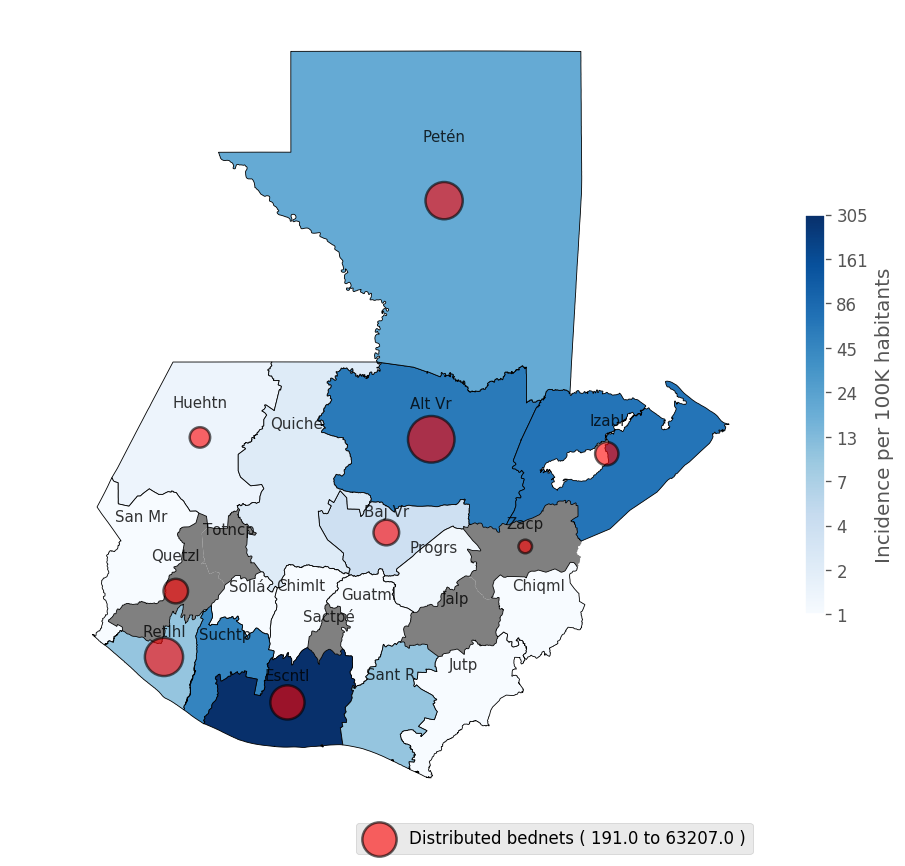

In [367]:
mlp.rcParams["figure.figsize"] = (8,8)
ax = plt.subplot(1,1,1)
mapMalaria(2017, ax, diff = 1)
plt.title("")
#ax = plt.subplot(2,2,2)

#mapMalaria(2016, ax)
#ax = plt.subplot(2,2,3)
#mapMalaria(2017, ax)
#ax = plt.subplot(2,2,4)
#mapMalaria(2018, ax)

In [1]:
peten = notifs[notifs.deptocode==17].DISTRITO.value_counts()

NameError: name 'notifs' is not defined

In [30]:
import difflib
def simplifyName(i):
    i = str(i).lower().strip()
    for v, vt in zip("aeiou", "áéíóú"):
        i = i.replace(vt, v)
    return i
def nombreToCode(i, depto):
    i = simplifyName(i)
    subset = data.munisGT[(data.munisGT.deptocode==depto)]
    ratios = subset.apply(lambda j: \
                   difflib.SequenceMatcher(None, i, j.simplifiedName).real_quick_ratio(),
              1)
    if len(ratios)>0:
        return subset.loc[ratios.idxmax()].municode
    return np.NaN

In [196]:
data.munisGT["simplifiedName"] = data.munisGT.name.map(simplifyName)

In [197]:
list(zip(peten.index, peten.index.map(lambda x: nombreToCode(x, 17))))

[('SAN JOSE', 1702),
 ('Las Cruces', 1703),
 ('FLORES', 1701),
 ('POPTUN', 1701),
 ('Sayaxche', 1702),
 ('El Naranjo', 1703),
 ('SAN FRANCISCO', 1706),
 ('DOLORES', 1708),
 ('MELCHOR DE MENCOS', 1711),
 ('CHACTE', 1701),
 ('SAN LUIS', 1702),
 ('EL CHAL', 1708),
 ('La Libertad', 1705),
 ('SANTA ANA', 1707)]

In [ ]:
data.munisGT[(data.munisGT.deptocode==17)]

In [187]:
ratios = subset.apply(lambda j: \
                   difflib.SequenceMatcher(None, "sjs", j.simplifiedName).real_quick_ratio(),
              1)
    

In [ ]:
subset.loc[ratios.index]

In [193]:
ratios

276    0.857143
277    0.857143
278    0.750000
279    0.666667
280    0.666667
281    0.545455
282    0.857143
283    0.857143
284    0.857143
285    0.750000
286    0.461538
287    0.857143
288    0.666667
289    0.857143
dtype: float64

# PDR

In [87]:
pdr.index = pdr.index.astype(int)

In [288]:

def _transform(column):
    def _inner_transform(g):
        i = g[column]
        a = sum(i<=3)
        b = len(i)-a
        return pd.Series(bernoulliBayesian(a,b)+ [a,b], index=["p", "ci1", "ci2", "a", "b"]);
    return _inner_transform
def plotPDRDelays(year, column):
    df = notifs[(notifs.GENERO!="d") & (notifs.EDAD < 100) & (notifs.Year==year)
              ].groupby(["deptocode"]).apply(_transform(column))
    df["pdr"] = pdr[year]
    df = df[df.ci1.isna() == False]
    yspace = [100,200,500,1000,5000,10000,40000]
    offsety = np.random.choice([1.02, 0.98], len(df))
    plt.errorbar(df.p*100, np.multiply(df.pdr.values,offsety), 
                 xerr =[100*(df.p - df.ci2), 100*(df.ci1-df.p)], fmt="o" , capsize=3, ) 
    _j = 0
    for _i, row in df.iterrows():
        plt.annotate(xy = (row.p*100, 
                               row.pdr*offsety[_j] ), s = str(int(_i)), 
                     verticalalignment = np.random.choice(["top", "bottom"]), fontsize=8)
        _j += 1
    plt.yscale("log", basey=10)
    plt.ylabel("PDR received")
    plt.xlabel("Percentage of cases with delay within 3 days")
    plt.yticks(yspace, yspace)

Text(0,0.5,'')

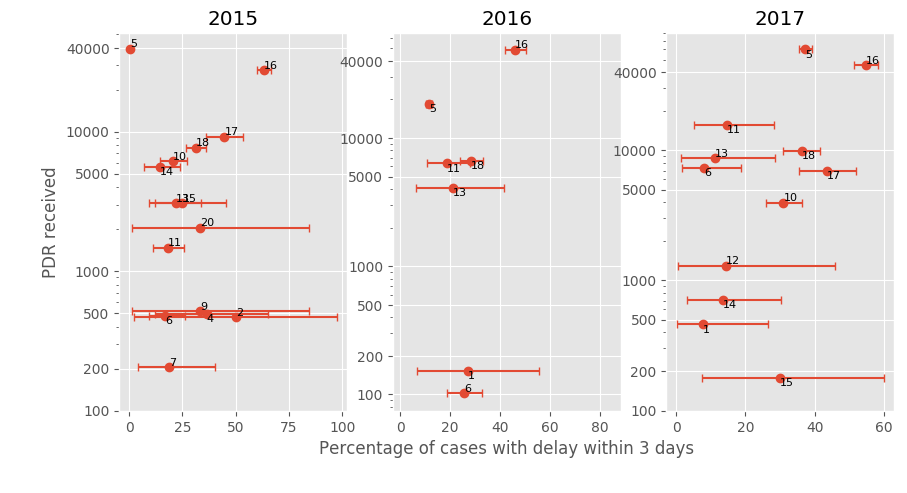

In [293]:
mlp.rcParams["figure.figsize"] = [10,5]
plt.subplot(1,3,1)
plotPDRDelays(2015, "Sintytom")
plt.title(2015)
plt.xlabel("")
plt.subplot(1,3,2)
plotPDRDelays(2016, "Sintytom")
plt.title(2016)
plt.ylabel("")
plt.subplot(1,3,3)
plotPDRDelays(2017, "Sintytom")
plt.title(2017)
plt.xlabel("")
plt.ylabel("")

Text(0,0.5,'')

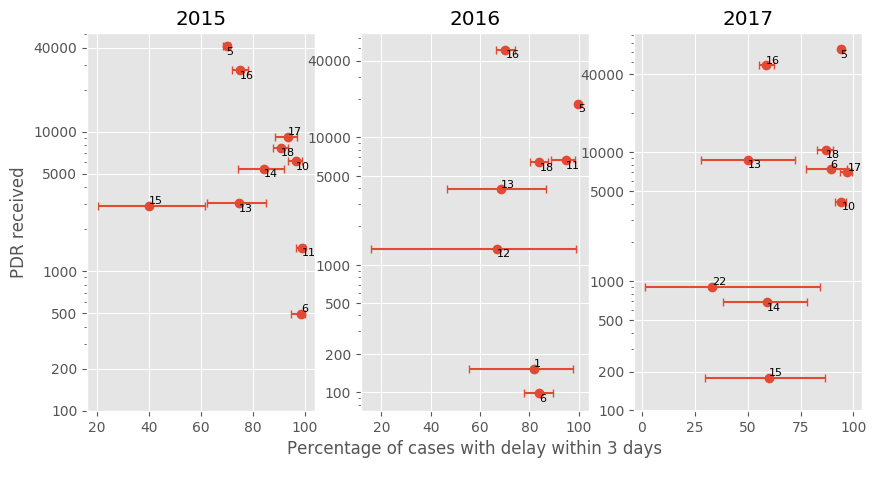

In [294]:
mlp.rcParams["figure.figsize"] = [10,5]
plt.subplot(1,3,1)
plotPDRDelays(2015, "tomydiag")
plt.title(2015)
plt.xlabel("")
plt.subplot(1,3,2)
plotPDRDelays(2016, "tomydiag")
plt.title(2016)
plt.ylabel("")
plt.subplot(1,3,3)
plotPDRDelays(2017, "tomydiag")
plt.title(2017)
plt.xlabel("")
plt.ylabel("")

Text(0.5,0,'')

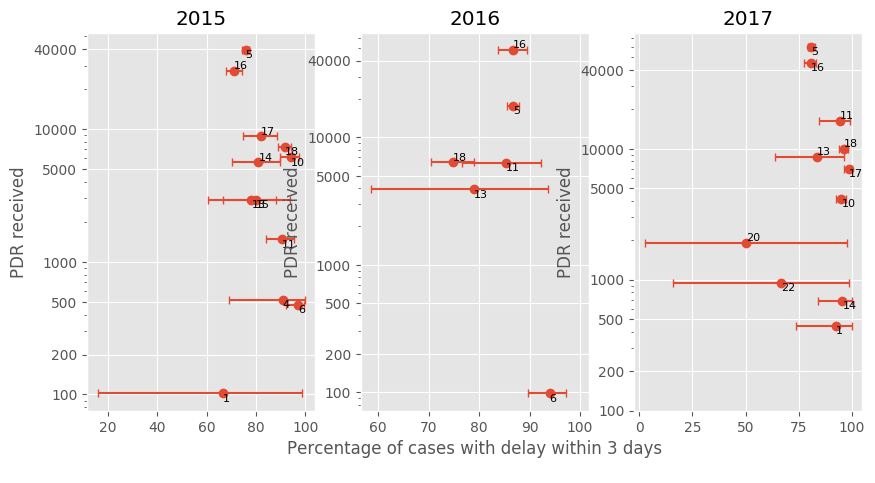

In [291]:
mlp.rcParams["figure.figsize"] = [10,5]
plt.subplot(1,3,1)
plotPDRDelays(2015, "diagytrat")
plt.title(2015)
plt.xlabel("")
plt.subplot(1,3,2)
plotPDRDelays(2016, "diagytrat")
plt.title(2016)
plt.subplot(1,3,3)
plotPDRDelays(2017, "diagytrat")
plt.title(2017)
plt.xlabel("")

In [318]:
notifs["TIPO DE MUESTRA"].value_counts(dropna=False)

GG     8119
A      6856
NaN     476
AA      275
PDR      56
A         1
Name: TIPO DE MUESTRA, dtype: int64

In [360]:
def safeInt(i):
    try:
        return int(i)
    except:
        return np.NaN

d = notifs[(notifs.Year > 2014) & (notifs["SEMANA EPIDEMIOLÓGICA"].map(safeInt) < 20)].assign(test=lambda x: x["TIPO DE MUESTRA"]\
                          .apply(lambda x: "PDR" if (type(x) == str) and (x.strip() in ["A", "AA", "PDR"]) 
                                                 else x))\
    .groupby(["test", "Year"]).apply(len)
#np.round(d.divide(d.sum(0), 1).fillna(0)*100)
d2 = d.unstack(0).fillna(0).assign(TotalCases = lambda x: x.sum(1)).assign(PDRPercentage= 
                                              lambda x: np.round(100*x.PDR/x.TotalCases).astype(int) )
d2[["PDRPercentage", "TotalCases"]].fillna(0).round(2)

test,PDRPercentage,TotalCases
Year,,
2015.0,29,2582
2016.0,44,2546
2017.0,60,1740
2018.0,82,1400


In [361]:
notifs[(notifs.Year > 2014) & (notifs["SEMANA EPIDEMIOLÓGICA"].map(safeInt) < 20)].Year.value_counts()

2016.0    2623
2015.0    2616
2017.0    1743
2018.0    1422
Name: Year, dtype: int64